In [1]:
import pdfplumber

with pdfplumber.open("sample/orgchart/20210501_Organigramm_Stand_01.05.2021.pdf") as pdf:
    first_page = pdf.pages[0]
    print(first_page.chars[0])

{'fontname': 'ArialMT', 'adv': Decimal('3.206'), 'upright': True, 'x0': Decimal('571.180'), 'y0': Decimal('488.408'), 'x1': Decimal('574.386'), 'y1': Decimal('492.848'), 'width': Decimal('3.206'), 'height': Decimal('4.440'), 'size': Decimal('4.440'), 'object_type': 'char', 'page_number': 1, 'stroking_color': 0, 'non_stroking_color': 0, 'text': 'N', 'top': Decimal('102.352'), 'bottom': Decimal('106.792'), 'doctop': Decimal('102.352')}


In [2]:
import itertools



def horizotal_or_vertical(line):
    if max([line["y0"],line["y1"]]) - min([line["y0"],line["y1"]]) <= 4:
        print(abs(max([line["y0"],line["y1"]]) - min([line["y0"],line["y1"]])))
        return "horizontal"
    elif abs(max([line["x0"],line["x1"]]) - min([line["x0"],line["x1"]])) <= 4:
        return "vertical"
    
    return None


def get_path(line):
    if horizotal_or_vertical(line) == "vertical":
        return {"start": min([line["y0"],line["y1"]]), "end": max([line["y0"],line["y1"]])}
    elif horizotal_or_vertical(line) == "horizontal":
        return {"start": min([line["x0"],line["x1"]]), "end": max([line["x0"],line["x1"]])}
    
    
def find_rectangles(paths):
    vertical_paths = [get_path(path) for path in paths if horizotal_or_vertical(path) == "vertical"]
    horizontal_paths_set = set([(get_path(path)["start"], get_path(path)["end"]) for path in paths if horizotal_or_vertical(path) == "horizontal"])
    
    print(vertical_paths)
    print(horizontal_paths_set)

    vertical_paths.sort(key=lambda path: path["start"], reverse=True)

    v_pairs = [pair for pair in list(itertools.combinations(vertical_paths, 2)) if pair[0]["start"] == pair[1]["start"] and pair[0]["end"] == pair[1]["end"]]

    rects = []
    for v1,v2 in v_pairs:
        h1 = (v1["start"], v2["start"])
        h2 = (v1["end"], v2["end"])

        if(h1 in horizontal_paths_set and h2 in horizontal_paths_set):
            #rects.append(Rect(h1[0], h1[1], h2[1], h2[0 ]))
            rects.append({'x0': h1[0], 'y0': h2[1], 'x1': h1[1], 'y1': h2[0], 'linewidth': Decimal('0.140'), 'stroke': False, 'fill': True, 'evenodd': True, 'stroking_color': 0, 'non_stroking_color': 0, 'object_type': 'rect', 'page_number': 1})

    return rects

# lines = first_page.lines
#lines = []
#for line in first_page.rects:
#    lines.append(line)
        
# print(find_rectangles(lines))
# print(first_page.rects)

im = first_page.to_image(resolution=1000)
#first_page = first_page.dedupe_chars(tolerance=3)
#im.draw_rects(first_page.rects)
#im.draw_rects(first_page.curves)

/Users/lilithwittmann/Library/Caches/pypoetry/virtualenvs/public-service-osint-i3LQR0Qa-py3.9/lib/python3.9/site-packages/PIL/Image.py:2855: DecompressionBombWarning: Image size (96657764 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [29]:
from PIL import Image
import cv2 
from IPython.display import display
import numpy as np
image = np.array(im.original)
#print(image)
original = image.copy()

blur = cv2.GaussianBlur(image, (5, 5), 0)
ret, thresh1 = cv2.threshold(blur, 150, 255, cv2.THRESH_BINARY)
bitwise = cv2.bitwise_not(thresh1)
erosion = cv2.erode(bitwise, np.ones((1, 1) ,np.uint8), iterations=5)
dilation = cv2.dilate(erosion, np.ones((3, 3) ,np.uint8), iterations=5)
display(Image.fromarray(dilation))

# Find contours
cnts, hir = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

display(Image.fromarray(cv2.drawContours(thresh, cnts, -1, (0,255,0), 5)))



In [40]:
print(first_page.lines)

for rect in first_page.rects:
    try:
        print(first_page.crop((rect["x0"],rect["top"], rect["x1"],rect["bottom"],)).extract_text(x_tolerance=3, y_tolerance=3))
        print((rect["x0"],rect["top"], rect["x1"],rect["bottom"],))
        print("-------")
    except Exception as e:
        print(e)
        

[{'x0': Decimal('271.190'), 'y0': Decimal('182.750'), 'x1': Decimal('347.990'), 'y1': Decimal('182.750'), 'width': Decimal('76.800'), 'height': Decimal('0'), 'pts': [(Decimal('271.190'), Decimal('182.750')), (Decimal('347.990'), Decimal('182.750'))], 'linewidth': Decimal('0.140'), 'stroke': True, 'fill': False, 'evenodd': False, 'stroking_color': 0, 'non_stroking_color': 0, 'object_type': 'line', 'page_number': 1, 'top': Decimal('412.450'), 'bottom': Decimal('412.450'), 'doctop': Decimal('412.450')}, {'x0': Decimal('271.190'), 'y0': Decimal('151.760'), 'x1': Decimal('347.990'), 'y1': Decimal('151.760'), 'width': Decimal('76.800'), 'height': Decimal('0'), 'pts': [(Decimal('271.190'), Decimal('151.760')), (Decimal('347.990'), Decimal('151.760'))], 'linewidth': Decimal('0.140'), 'stroke': True, 'fill': False, 'evenodd': False, 'stroking_color': 0, 'non_stroking_color': 0, 'object_type': 'line', 'page_number': 1, 'top': Decimal('443.440'), 'bottom': Decimal('443.440'), 'doctop': Decimal('4

Personal, FDiniaennzsetrne,c Ohtrganisation, 
(Decimal('94.224'), Decimal('262.970'), Decimal('171.624'), Decimal('267.770'))
-------
Verfassung, Kommunales, Recht
(Decimal('182.540'), Decimal('262.970'), Decimal('259.964'), Decimal('267.770'))
-------
Landespolizeipräsidium
(Decimal('270.890'), Decimal('262.970'), Decimal('348.290'), Decimal('267.770'))
-------
AusläVnedrefar susnudn Fgslüscchhtulintzg, e ,K Mulitgurration,
(Decimal('359.210'), Decimal('262.970'), Decimal('436.634'), Decimal('267.770'))
-------
VerwIaTl,t uEn-gGsomveordnemrneisnite, rung
(Decimal('447.550'), Decimal('262.970'), Decimal('525.910'), Decimal('267.770'))
-------
BeKvörilskeenrumnagnsasgcehmutez nutnd 
(Decimal('536.830'), Decimal('262.970'), Decimal('614.254'), Decimal('267.770'))
-------
Digitalisierung
(Decimal('625.180'), Decimal('262.970'), Decimal('702.580'), Decimal('267.770'))
-------
Dienstrecht
(Decimal('94.224'), Decimal('267.650'), Decimal('171.624'), Decimal('272.450'))
-------
None
(Decimal('

KommunalesD Vieenrsfatrsescuhntgsrecht und 
(Decimal('182.540'), Decimal('327.910'), Decimal('259.964'), Decimal('337.390'))
-------
None
(Decimal('270.890'), Decimal('327.910'), Decimal('348.290'), Decimal('337.390'))
-------
Erstaufnahme von Flüchtlingen
(Decimal('359.210'), Decimal('327.910'), Decimal('436.634'), Decimal('337.390'))
-------
E-Government, Open Government, 
Verwaltungsmodernisierung
(Decimal('447.550'), Decimal('327.910'), Decimal('525.910'), Decimal('337.390'))
-------
Feuerwehr und Brandschutz
(Decimal('536.830'), Decimal('327.910'), Decimal('614.254'), Decimal('337.390'))
-------
DigitaliCsiyebruenrsgicshsterarhteegitie und 
(Decimal('625.180'), Decimal('327.910'), Decimal('702.580'), Decimal('337.390'))
-------
None
(Decimal('713.500'), Decimal('327.910'), Decimal('724.684'), Decimal('337.390'))
-------
None
(Decimal('94.224'), Decimal('337.270'), Decimal('171.624'), Decimal('342.070'))
-------
None
(Decimal('182.540'), Decimal('337.270'), Decimal('259.964'), Deci

None
(Decimal('713.500'), Decimal('418.036'), Decimal('724.684'), Decimal('443.500'))
-------
MR Straile
(Decimal('94.224'), Decimal('443.380'), Decimal('155.064'), Decimal('449.140'))
-------
MR Poymann
(Decimal('182.540'), Decimal('443.380'), Decimal('243.404'), Decimal('449.140'))
-------
MR'in Graf
(Decimal('359.210'), Decimal('443.380'), Decimal('420.074'), Decimal('449.140'))
-------
MR Wellhäußer
(Decimal('447.550'), Decimal('443.380'), Decimal('509.350'), Decimal('449.140'))
-------
MR Willms
(Decimal('536.830'), Decimal('443.380'), Decimal('597.694'), Decimal('449.140'))
-------
None
(Decimal('625.180'), Decimal('443.380'), Decimal('686.020'), Decimal('449.140'))
-------
None
(Decimal('713.500'), Decimal('443.380'), Decimal('724.684'), Decimal('449.140'))
-------
Referat 26
(Decimal('182.540'), Decimal('449.020'), Decimal('259.964'), Decimal('454.900'))
-------
LKD Ziwey
Referat 33
(Decimal('270.890'), Decimal('449.020'), Decimal('331.730'), Decimal('454.900'))
-------
Referat

None
(Decimal('485.830'), Decimal('125.780'), Decimal('486.550'), Decimal('136.940'))
-------
None
(Decimal('486.550'), Decimal('165.380'), Decimal('530.950'), Decimal('165.740'))
-------
None
(Decimal('204.860'), Decimal('171.140'), Decimal('287.684'), Decimal('171.500'))
-------
None
(Decimal('436.750'), Decimal('171.140'), Decimal('485.830'), Decimal('171.500'))
-------
None
(Decimal('50.280'), Decimal('176.900'), Decimal('193.820'), Decimal('177.260'))
-------
None
(Decimal('204.500'), Decimal('153.860'), Decimal('204.860'), Decimal('171.500'))
-------
None
(Decimal('287.330'), Decimal('165.860'), Decimal('287.690'), Decimal('171.500'))
-------
None
(Decimal('204.860'), Decimal('176.900'), Decimal('287.684'), Decimal('177.260'))
-------
None
(Decimal('298.730'), Decimal('176.900'), Decimal('391.970'), Decimal('177.260'))
-------
3010
(Decimal('392.690'), Decimal('176.900'), Decimal('420.194'), Decimal('177.260'))
-------
MD Stefan Krebs
(Decimal('553.630'), Decimal('176.900'), Deci

None
(Decimal('575.380'), Decimal('182.666'), Decimal('575.740'), Decimal('200.330'))
-------
None
(Decimal('395.330'), Decimal('217.010'), Decimal('398.570'), Decimal('217.730'))
-------
None
(Decimal('401.830'), Decimal('217.010'), Decimal('405.070'), Decimal('217.730'))
-------
None
(Decimal('408.310'), Decimal('217.010'), Decimal('411.550'), Decimal('217.730'))
-------
None
(Decimal('414.790'), Decimal('217.010'), Decimal('418.030'), Decimal('217.730'))
-------
None
(Decimal('421.270'), Decimal('217.010'), Decimal('424.510'), Decimal('217.730'))
-------
None
(Decimal('427.750'), Decimal('217.010'), Decimal('430.990'), Decimal('217.730'))
-------
None
(Decimal('434.230'), Decimal('217.010'), Decimal('437.470'), Decimal('217.730'))
-------
None
(Decimal('440.710'), Decimal('217.010'), Decimal('443.950'), Decimal('217.730'))
-------
None
(Decimal('447.190'), Decimal('217.010'), Decimal('450.430'), Decimal('217.730'))
-------
None
(Decimal('453.670'), Decimal('217.010'), Decimal('456.9

None
(Decimal('127.700'), Decimal('242.570'), Decimal('132.380'), Decimal('243.290'))
-------
None
(Decimal('133.460'), Decimal('242.570'), Decimal('226.220'), Decimal('243.290'))
-------
None
(Decimal('287.090'), Decimal('217.010'), Decimal('287.810'), Decimal('217.130'))
-------
None
(Decimal('287.090'), Decimal('220.370'), Decimal('287.810'), Decimal('223.610'))
-------
None
(Decimal('287.090'), Decimal('226.850'), Decimal('287.810'), Decimal('230.090'))
-------
None
(Decimal('287.090'), Decimal('233.330'), Decimal('287.810'), Decimal('236.570'))
-------
None
(Decimal('287.090'), Decimal('239.810'), Decimal('287.810'), Decimal('242.570'))
-------
None
(Decimal('287.090'), Decimal('218.210'), Decimal('287.810'), Decimal('219.290'))
-------
None
(Decimal('287.090'), Decimal('224.690'), Decimal('287.810'), Decimal('225.770'))
-------
None
(Decimal('287.090'), Decimal('231.170'), Decimal('287.810'), Decimal('232.250'))
-------
None
(Decimal('287.090'), Decimal('237.650'), Decimal('287.8

None
(Decimal('499.030'), Decimal('499.656'), Decimal('499.390'), Decimal('500.016'))
-------
None
(Decimal('499.750'), Decimal('499.656'), Decimal('500.110'), Decimal('500.016'))
-------
None
(Decimal('500.470'), Decimal('499.656'), Decimal('500.830'), Decimal('500.016'))
-------
None
(Decimal('501.190'), Decimal('499.656'), Decimal('501.550'), Decimal('500.016'))
-------
None
(Decimal('501.910'), Decimal('499.656'), Decimal('502.270'), Decimal('500.016'))
-------
None
(Decimal('502.630'), Decimal('499.656'), Decimal('502.990'), Decimal('500.016'))
-------
None
(Decimal('503.350'), Decimal('499.656'), Decimal('503.710'), Decimal('500.016'))
-------
None
(Decimal('504.070'), Decimal('499.656'), Decimal('504.430'), Decimal('500.016'))
-------
None
(Decimal('504.790'), Decimal('499.656'), Decimal('505.150'), Decimal('500.016'))
-------
None
(Decimal('505.510'), Decimal('499.656'), Decimal('505.870'), Decimal('500.016'))
-------
None
(Decimal('506.230'), Decimal('499.656'), Decimal('506.5

None
(Decimal('565.300'), Decimal('499.656'), Decimal('565.660'), Decimal('500.016'))
-------
None
(Decimal('566.020'), Decimal('499.656'), Decimal('566.380'), Decimal('500.016'))
-------
None
(Decimal('566.740'), Decimal('499.656'), Decimal('567.100'), Decimal('500.016'))
-------
None
(Decimal('567.460'), Decimal('499.656'), Decimal('567.820'), Decimal('500.016'))
-------
None
(Decimal('568.180'), Decimal('499.656'), Decimal('568.540'), Decimal('500.016'))
-------
None
(Decimal('568.900'), Decimal('499.656'), Decimal('569.260'), Decimal('500.016'))
-------
None
(Decimal('569.620'), Decimal('499.656'), Decimal('569.980'), Decimal('500.016'))
-------
None
(Decimal('570.340'), Decimal('499.656'), Decimal('570.700'), Decimal('500.016'))
-------
None
(Decimal('571.060'), Decimal('499.656'), Decimal('571.420'), Decimal('500.016'))
-------
None
(Decimal('571.780'), Decimal('499.656'), Decimal('572.140'), Decimal('500.016'))
-------
None
(Decimal('572.500'), Decimal('499.656'), Decimal('572.8

None
(Decimal('602.980'), Decimal('506.976'), Decimal('603.340'), Decimal('507.336'))
-------
None
(Decimal('602.980'), Decimal('507.696'), Decimal('603.340'), Decimal('508.056'))
-------
None
(Decimal('602.980'), Decimal('508.416'), Decimal('603.340'), Decimal('508.776'))
-------
None
(Decimal('602.980'), Decimal('509.136'), Decimal('603.340'), Decimal('509.496'))
-------
None
(Decimal('602.980'), Decimal('509.856'), Decimal('603.340'), Decimal('510.216'))
-------
None
(Decimal('602.980'), Decimal('510.576'), Decimal('603.340'), Decimal('510.936'))
-------
None
(Decimal('602.980'), Decimal('511.296'), Decimal('603.340'), Decimal('511.656'))
-------
None
(Decimal('602.980'), Decimal('512.016'), Decimal('603.340'), Decimal('512.376'))
-------
None
(Decimal('602.980'), Decimal('512.736'), Decimal('603.340'), Decimal('513.096'))
-------
None
(Decimal('602.980'), Decimal('513.456'), Decimal('603.340'), Decimal('513.816'))
-------
None
(Decimal('602.980'), Decimal('514.176'), Decimal('603.3

None
(Decimal('541.510'), Decimal('550.056'), Decimal('541.870'), Decimal('550.416'))
-------
None
(Decimal('542.230'), Decimal('550.056'), Decimal('542.590'), Decimal('550.416'))
-------
None
(Decimal('542.950'), Decimal('550.056'), Decimal('543.310'), Decimal('550.416'))
-------
None
(Decimal('543.670'), Decimal('550.056'), Decimal('544.030'), Decimal('550.416'))
-------
None
(Decimal('544.390'), Decimal('550.056'), Decimal('544.750'), Decimal('550.416'))
-------
None
(Decimal('545.110'), Decimal('550.056'), Decimal('545.470'), Decimal('550.416'))
-------
None
(Decimal('545.830'), Decimal('550.056'), Decimal('546.190'), Decimal('550.416'))
-------
None
(Decimal('546.550'), Decimal('550.056'), Decimal('546.910'), Decimal('550.416'))
-------
None
(Decimal('547.270'), Decimal('550.056'), Decimal('547.630'), Decimal('550.416'))
-------
None
(Decimal('547.990'), Decimal('550.056'), Decimal('548.350'), Decimal('550.416'))
-------
None
(Decimal('548.710'), Decimal('550.056'), Decimal('549.0

None
(Decimal('547.750'), Decimal('136.940'), Decimal('548.110'), Decimal('165.740'))
-------
None
(Decimal('414.070'), Decimal('90.140'), Decimal('414.790'), Decimal('112.940'))
-------
None
(Decimal('49.920'), Decimal('130.820'), Decimal('50.280'), Decimal('177.260'))
-------
None
(Decimal('193.460'), Decimal('131.180'), Decimal('193.820'), Decimal('177.260'))
-------
None
(Decimal('204.500'), Decimal('176.906'), Decimal('204.860'), Decimal('194.570'))
-------
None
(Decimal('287.090'), Decimal('246.290'), Decimal('287.810'), Decimal('249.530'))
-------
None
(Decimal('287.090'), Decimal('244.130'), Decimal('287.810'), Decimal('245.210'))
-------
None
(Decimal('287.090'), Decimal('250.610'), Decimal('287.810'), Decimal('251.690'))
-------
None
(Decimal('348.050'), Decimal('427.756'), Decimal('348.410'), Decimal('565.296'))
-------
None
(Decimal('485.830'), Decimal('243.290'), Decimal('486.550'), Decimal('245.210'))
-------
None
(Decimal('485.830'), Decimal('246.290'), Decimal('486.550'

None
(Decimal('491.590'), Decimal('532.176'), Decimal('491.950'), Decimal('532.536'))
-------
None
(Decimal('491.590'), Decimal('532.896'), Decimal('491.950'), Decimal('533.256'))
-------
None
(Decimal('491.590'), Decimal('533.616'), Decimal('491.950'), Decimal('533.976'))
-------
None
(Decimal('491.590'), Decimal('534.336'), Decimal('491.950'), Decimal('534.696'))
-------
None
(Decimal('491.590'), Decimal('535.056'), Decimal('491.950'), Decimal('535.416'))
-------
None
(Decimal('491.590'), Decimal('535.776'), Decimal('491.950'), Decimal('536.136'))
-------
None
(Decimal('491.590'), Decimal('536.496'), Decimal('491.950'), Decimal('536.856'))
-------
None
(Decimal('491.590'), Decimal('537.216'), Decimal('491.950'), Decimal('537.576'))
-------
None
(Decimal('491.590'), Decimal('537.936'), Decimal('491.950'), Decimal('538.296'))
-------
None
(Decimal('491.590'), Decimal('538.656'), Decimal('491.950'), Decimal('539.016'))
-------
None
(Decimal('491.590'), Decimal('539.376'), Decimal('491.9

None
(Decimal('691.300'), Decimal('217.010'), Decimal('692.380'), Decimal('217.730'))
-------
MR Dr. Fritzsch 3480
(Decimal('697.540'), Decimal('227.810'), Decimal('774.844'), Decimal('228.890'))
-------
None
(Decimal('486.550'), Decimal('233.090'), Decimal('487.150'), Decimal('233.810'))
-------
None
(Decimal('488.230'), Decimal('233.090'), Decimal('491.470'), Decimal('233.810'))
-------
None
(Decimal('492.550'), Decimal('233.090'), Decimal('495.790'), Decimal('233.810'))
-------
None
(Decimal('496.870'), Decimal('233.090'), Decimal('500.110'), Decimal('233.810'))
-------
None
(Decimal('501.190'), Decimal('233.090'), Decimal('504.430'), Decimal('233.810'))
-------
None
(Decimal('505.510'), Decimal('233.090'), Decimal('508.750'), Decimal('233.810'))
-------
None
(Decimal('509.830'), Decimal('233.090'), Decimal('513.070'), Decimal('233.810'))
-------
None
(Decimal('514.150'), Decimal('233.090'), Decimal('517.390'), Decimal('233.810'))
-------
None
(Decimal('518.470'), Decimal('233.090')

None
(Decimal('511.990'), Decimal('520.176'), Decimal('512.350'), Decimal('520.536'))
-------
None
(Decimal('512.710'), Decimal('520.176'), Decimal('513.070'), Decimal('520.536'))
-------
None
(Decimal('513.430'), Decimal('520.176'), Decimal('513.790'), Decimal('520.536'))
-------
None
(Decimal('514.150'), Decimal('520.176'), Decimal('514.510'), Decimal('520.536'))
-------
None
(Decimal('514.870'), Decimal('520.176'), Decimal('515.230'), Decimal('520.536'))
-------
None
(Decimal('515.590'), Decimal('520.176'), Decimal('515.950'), Decimal('520.536'))
-------
None
(Decimal('516.310'), Decimal('520.176'), Decimal('516.670'), Decimal('520.536'))
-------
None
(Decimal('517.030'), Decimal('520.176'), Decimal('517.390'), Decimal('520.536'))
-------
None
(Decimal('517.750'), Decimal('520.176'), Decimal('518.110'), Decimal('520.536'))
-------
None
(Decimal('518.470'), Decimal('520.176'), Decimal('518.830'), Decimal('520.536'))
-------
None
(Decimal('519.190'), Decimal('520.176'), Decimal('519.5

None
(Decimal('578.980'), Decimal('520.176'), Decimal('579.340'), Decimal('520.536'))
-------
None
(Decimal('579.700'), Decimal('520.176'), Decimal('580.060'), Decimal('520.536'))
-------
None
(Decimal('580.420'), Decimal('520.176'), Decimal('580.780'), Decimal('520.536'))
-------
None
(Decimal('581.140'), Decimal('520.176'), Decimal('581.500'), Decimal('520.536'))
-------
None
(Decimal('581.860'), Decimal('520.176'), Decimal('582.220'), Decimal('520.536'))
-------
None
(Decimal('582.580'), Decimal('520.176'), Decimal('582.940'), Decimal('520.536'))
-------
None
(Decimal('583.300'), Decimal('520.176'), Decimal('583.660'), Decimal('520.536'))
-------
None
(Decimal('584.020'), Decimal('520.176'), Decimal('584.380'), Decimal('520.536'))
-------
None
(Decimal('584.740'), Decimal('520.176'), Decimal('585.100'), Decimal('520.536'))
-------
None
(Decimal('585.460'), Decimal('520.176'), Decimal('585.820'), Decimal('520.536'))
-------
None
(Decimal('586.180'), Decimal('520.176'), Decimal('586.5

None
(Decimal('533.590'), Decimal('531.216'), Decimal('533.950'), Decimal('531.576'))
-------
None
(Decimal('534.310'), Decimal('531.216'), Decimal('534.670'), Decimal('531.576'))
-------
None
(Decimal('535.030'), Decimal('531.216'), Decimal('535.390'), Decimal('531.576'))
-------
None
(Decimal('535.750'), Decimal('531.216'), Decimal('536.110'), Decimal('531.576'))
-------
None
(Decimal('536.470'), Decimal('531.216'), Decimal('536.830'), Decimal('531.576'))
-------
None
(Decimal('537.190'), Decimal('531.216'), Decimal('537.550'), Decimal('531.576'))
-------
None
(Decimal('537.910'), Decimal('531.216'), Decimal('538.270'), Decimal('531.576'))
-------
None
(Decimal('538.630'), Decimal('531.216'), Decimal('538.990'), Decimal('531.576'))
-------
None
(Decimal('539.350'), Decimal('531.216'), Decimal('539.710'), Decimal('531.576'))
-------
None
(Decimal('540.070'), Decimal('531.216'), Decimal('540.430'), Decimal('531.576'))
-------
None
(Decimal('540.790'), Decimal('531.216'), Decimal('541.1

None
(Decimal('596.980'), Decimal('531.216'), Decimal('597.340'), Decimal('531.576'))
-------
None
(Decimal('597.700'), Decimal('531.216'), Decimal('598.060'), Decimal('531.576'))
-------
None
(Decimal('598.420'), Decimal('531.216'), Decimal('598.780'), Decimal('531.576'))
-------
None
(Decimal('599.140'), Decimal('531.216'), Decimal('599.500'), Decimal('531.576'))
-------
None
(Decimal('599.860'), Decimal('531.216'), Decimal('600.220'), Decimal('531.576'))
-------
None
(Decimal('600.580'), Decimal('531.216'), Decimal('600.940'), Decimal('531.576'))
-------
None
(Decimal('601.300'), Decimal('531.216'), Decimal('601.660'), Decimal('531.576'))
-------
None
(Decimal('602.020'), Decimal('531.216'), Decimal('602.380'), Decimal('531.576'))
-------
None
(Decimal('602.740'), Decimal('531.216'), Decimal('603.100'), Decimal('531.576'))
-------
None
(Decimal('636.220'), Decimal('535.656'), Decimal('638.380'), Decimal('536.376'))
-------
None
(Decimal('639.460'), Decimal('535.656'), Decimal('642.7

In [54]:
rect_json = []
import json
import decimal
import uuid


class DecimalEncoder(json.JSONEncoder):
    def default(self, o):
        if isinstance(o, decimal.Decimal):
            # wanted a simple yield str(o) in the next line,
            # but that would mean a yield on the line with super(...),
            # which wouldn't work (see my comment below), so...
            return (str(o) for o in [o])
        return super(DecimalEncoder, self).default(o)
    
non_workig_rects = [] 
for rect in first_page.rects:
    try:
        text = first_page.crop((rect["x0"],rect["top"], rect["x1"],rect["bottom"],)).extract_text(x_tolerance=3, y_tolerance=3)
        text = text.strip()
        text_len = len(text)
        #print(text)
        #print(len(text))
        if text_len > 1 and text_len < 250: 
            obj = {"position": [float(rect["x0"]),float(rect["top"]), float(rect["x1"]),float(rect["bottom"])], "text": text}
            if obj not in rect_json:
                #print(json.dumps(obj))
                rect_json.append(obj)
            else:
                #print("already added")
                pass
        else:
            #print("text to long")
            pass
                
    
    
    except Exception as e:
        non_workig_rects.append(rect)
        

im = first_page.to_image(resolution=500)
first_page = first_page.dedupe_chars(tolerance=3)
#im.draw_rects(first_page.rects)
#im.draw_rects(first_page.curves)

        
uuid_elements = []

for e in rect_json:
    e["id"] = str(uuid.uuid4())
    uuid_elements.append(e)
        
        
#print(json.dumps(uuid_elements, indent=4, sort_keys=True))
im.draw_rects(non_workig_rects)



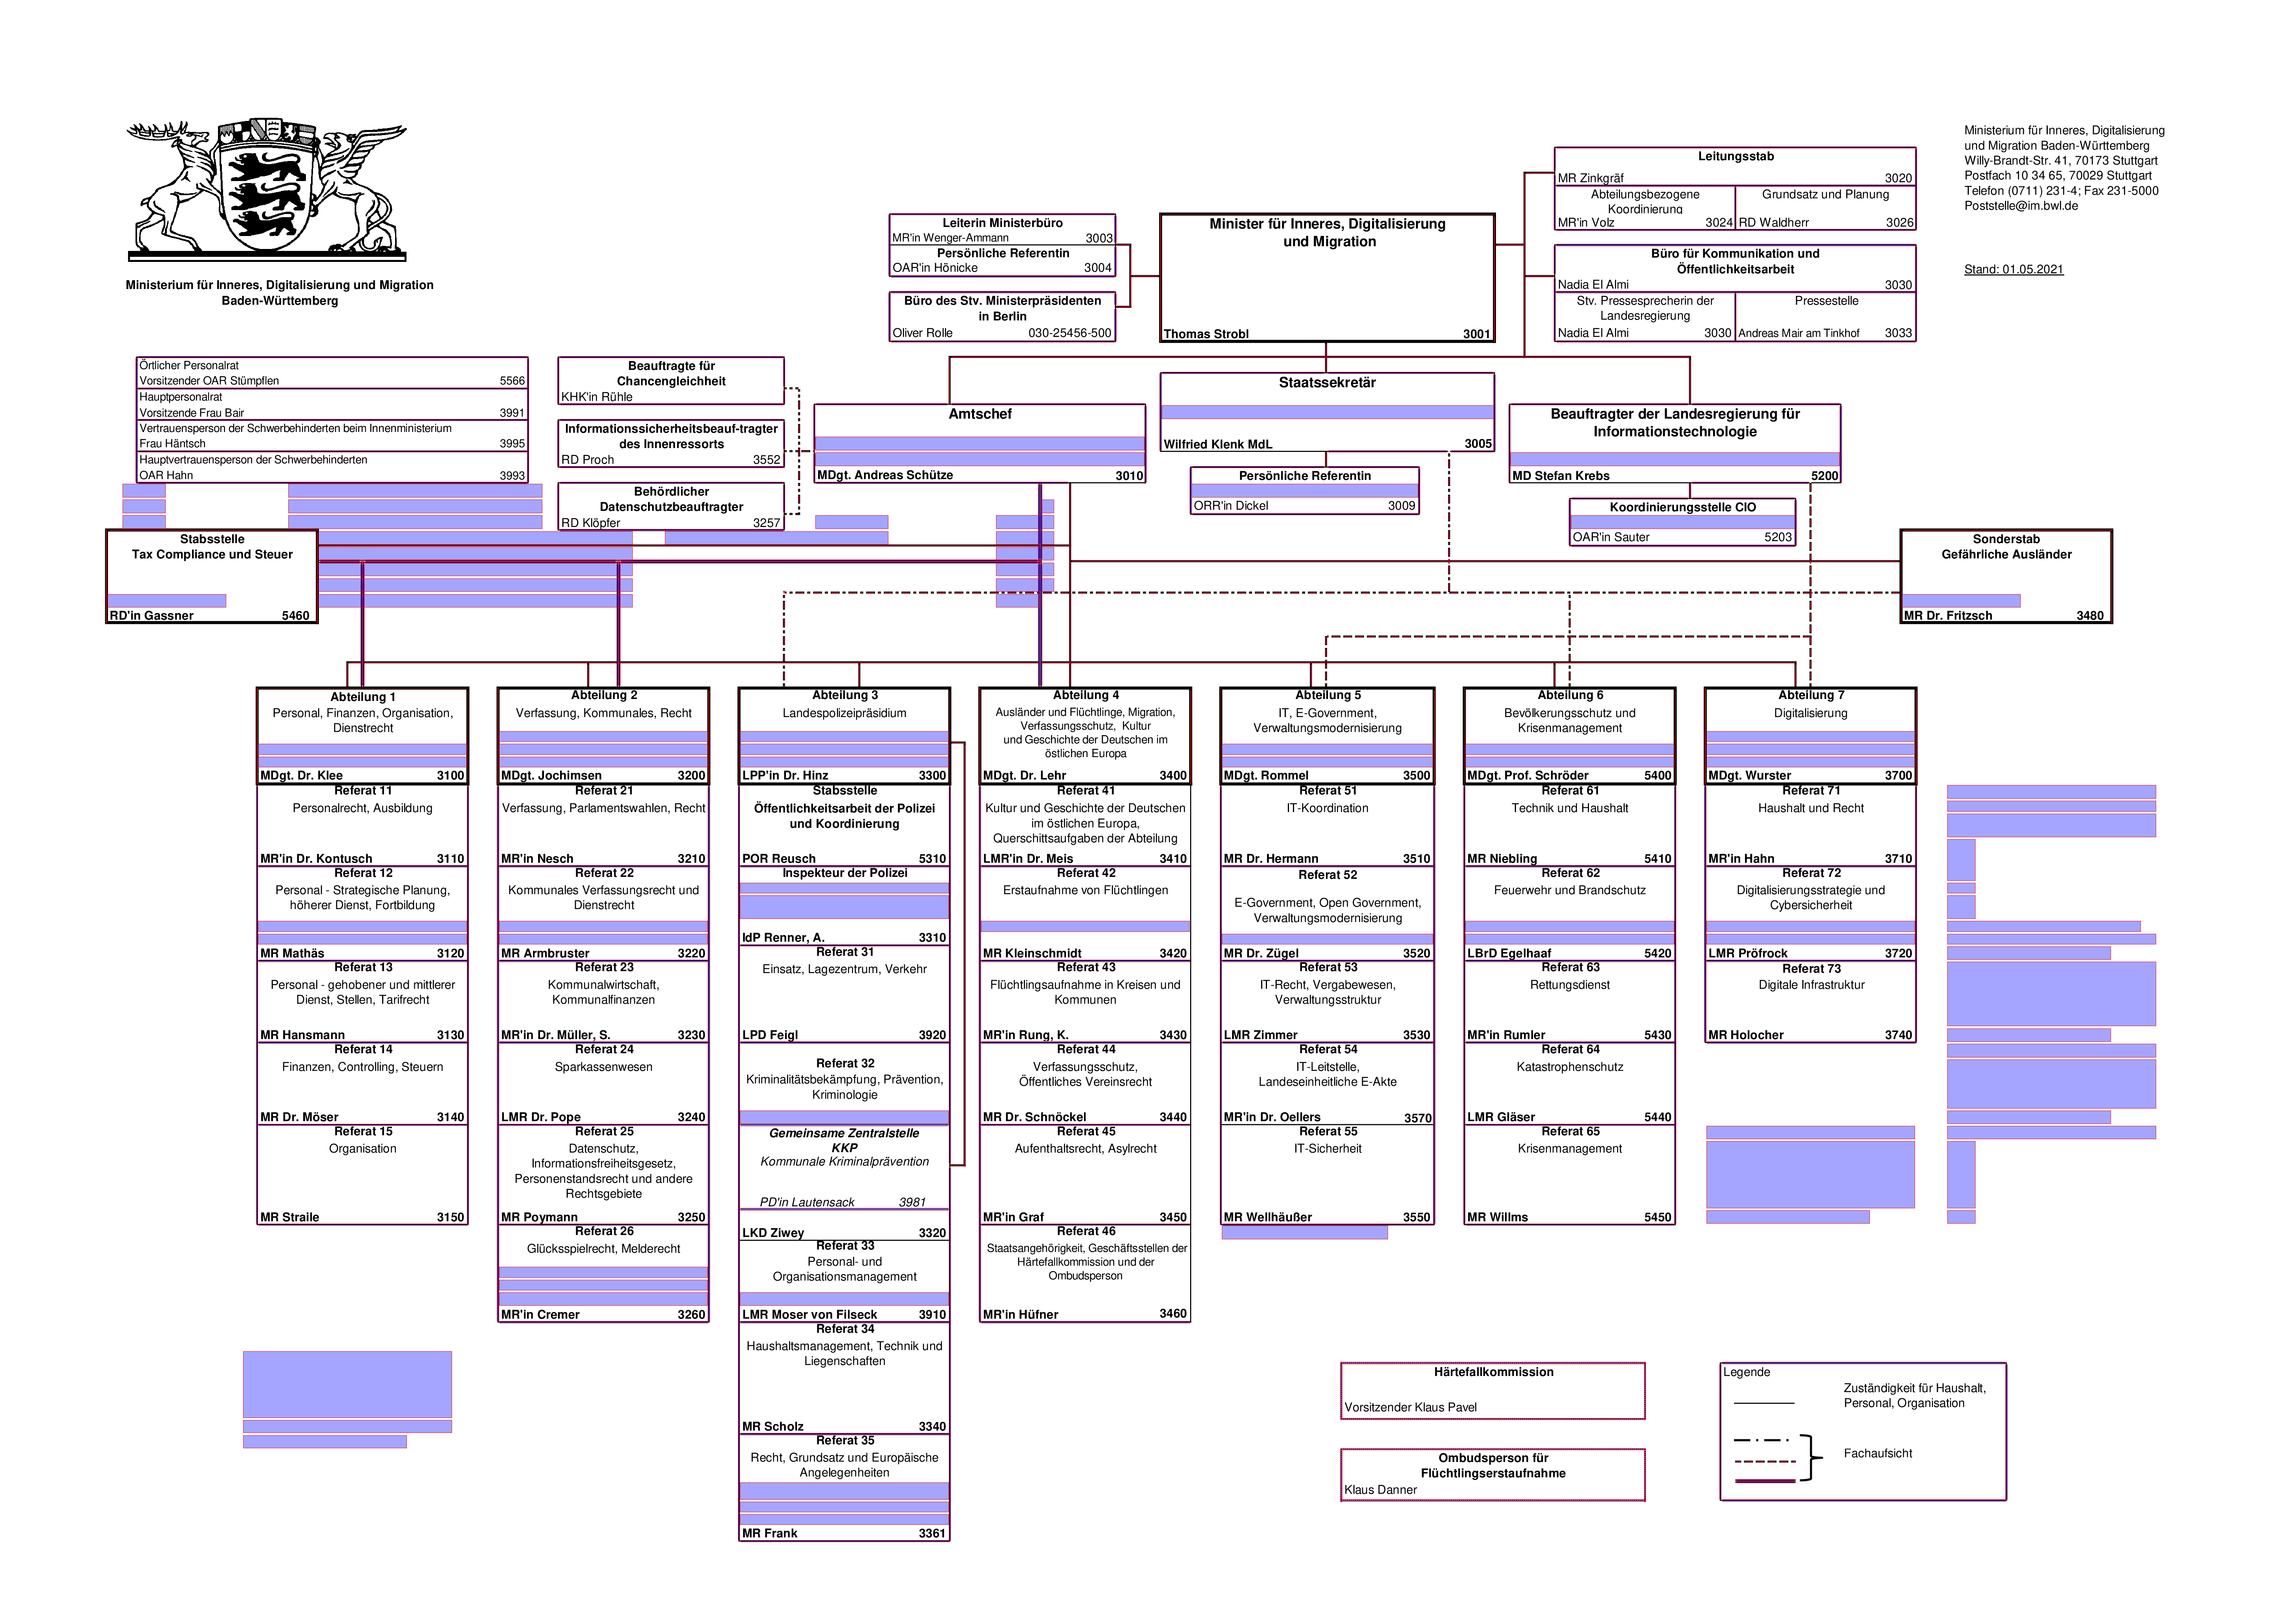

In [55]:
im.draw_rects(non_workig_rects)